In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load data

In [2]:
df_New=pd.read_csv('Humandataset.csv')
df_New.head()

,Unnamed: 0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
df_New.drop(columns='Unnamed: 0',inplace=True)


In [4]:
df_New.iloc[0,:30]

tBodyAcc-mean()-X          0.288585
tBodyAcc-mean()-Y        -0.0202942
tBodyAcc-mean()-Z         -0.132905
tBodyAcc-std()-X          -0.995279
tBodyAcc-std()-Y          -0.983111
tBodyAcc-std()-Z          -0.913526
tBodyAcc-mad()-X          -0.995112
tBodyAcc-mad()-Y          -0.983185
tBodyAcc-mad()-Z          -0.923527
tBodyAcc-max()-X          -0.934724
tBodyAcc-max()-Y          -0.567378
tBodyAcc-max()-Z          -0.744413
tBodyAcc-min()-X           0.852947
tBodyAcc-min()-Y           0.685845
tBodyAcc-min()-Z           0.814263
tBodyAcc-sma()            -0.965523
tBodyAcc-energy()-X       -0.999945
tBodyAcc-energy()-Y       -0.999863
tBodyAcc-energy()-Z       -0.994612
tBodyAcc-iqr()-X          -0.994231
tBodyAcc-iqr()-Y          -0.987614
tBodyAcc-iqr()-Z           -0.94322
tBodyAcc-entropy()-X      -0.407747
tBodyAcc-entropy()-Y      -0.679338
tBodyAcc-entropy()-Z      -0.602122
tBodyAcc-arCoeff()-X,1     0.929294
tBodyAcc-arCoeff()-X,2    -0.853011
tBodyAcc-arCoeff()-X,3      

In [5]:
df_New.isnull().sum().all()

False

In [6]:
df_New.duplicated().sum().all()

False

In [7]:
df_New.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


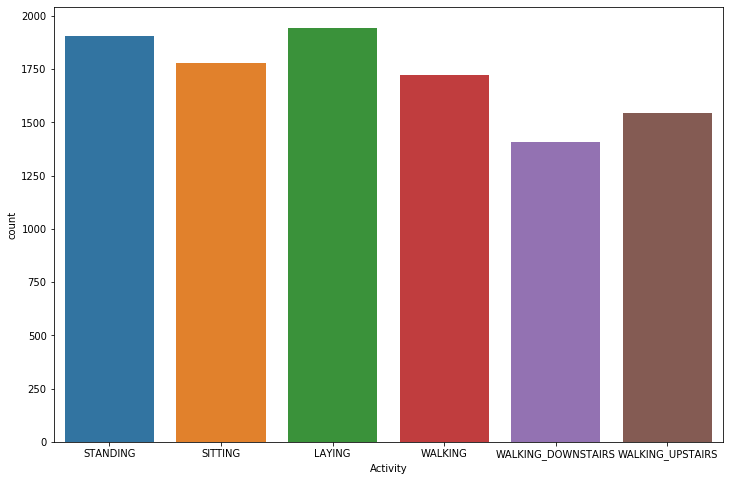

In [8]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'Activity', data = df_New);

In [9]:
X=df_New.iloc[:,:-2]
y=df_New.iloc[:,-1:]

# Classification Phase


### Splitting data to train and test

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

During train uncomment this cell

In [11]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (8239, 561)
X_test_shape ----> (2060, 561)
Y_train_shape ----> (8239, 1)
Y_test_shape ----> (2060, 1)


During train uncomment this cell

### Preprocessimg label data and feature

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_labeled=le.fit_transform(y_train)
y_labeled_test=le.transform(y_test)
Y_all=le.transform(y)


C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
z=le.inverse_transform(np.unique(y_labeled))


In [14]:
z

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [15]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_Scaler_train=sc.fit_transform(X_train)
x_Scaler_test=sc.transform(X_test)

X_all=sc.transform(X)


### Using Support vector machine Classification

In [64]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'linear',C=1,gamma=0.001)
x=classifier_SVC.fit(x_Scaler_train,y_labeled)





In [32]:
cv_svm_train = cross_val_score(classifier_SVC , X_all , Y_all, cv = 10)
print("Cross validation for train data SVC is : ", cv_svm_train)

Cross validation for train data SVC is :  [0.97281553 0.94174757 0.89320388 0.96990291 0.97378641 0.98543689
 0.96893204 0.97184466 0.95631068 0.97667638]


During train uncomment this cell

Confusion matrix is :
  [[392   0   0   0   0   0]
 [  0 340   9   0   0   0]
 [  0  11 345   0   0   0]
 [  0   0   0 347   0   2]
 [  0   0   0   0 296   0]
 [  0   0   0   0   0 318]]


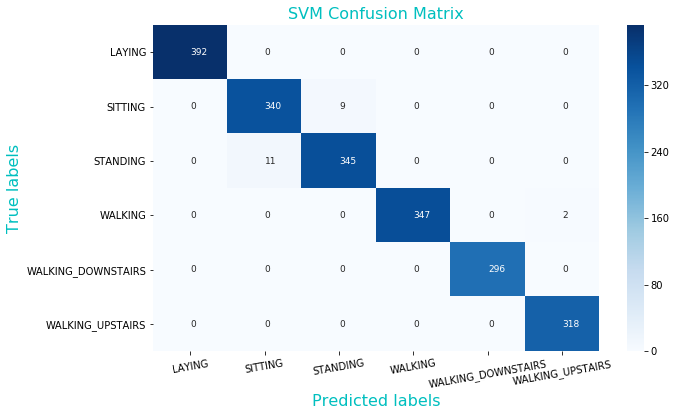

In [65]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test,y_pred_SVC)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('SVM Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10,rotation=0)
ax.xaxis.set_ticklabels(z,rotation=10);
ax.yaxis.set_ticklabels(z);
plt.savefig('ss.jpg')


### Showing Accuracy using accuracy_score

In [18]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC--------->',round(accuracy_score(y_labeled_test, y_pred_SVC),2))


Accuracy of SVC---------> 0.99


In [39]:
x=list(set(y_labeled_test))
x


[0, 1, 2, 3, 4, 5]

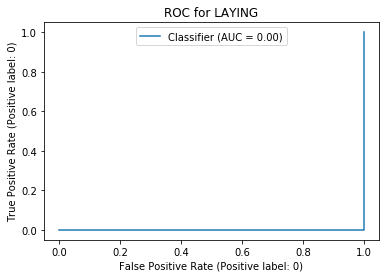

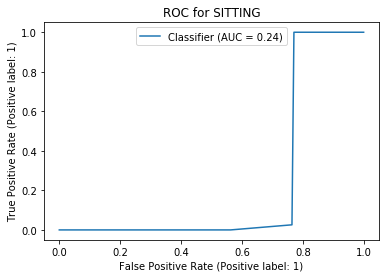

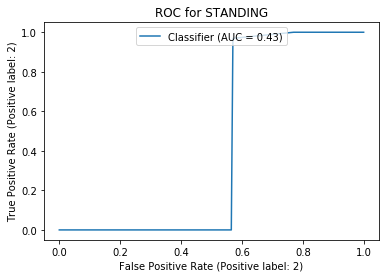

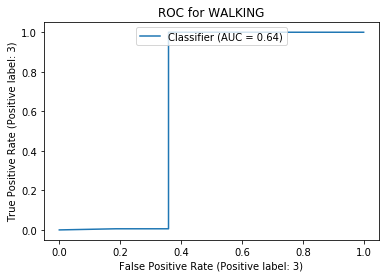

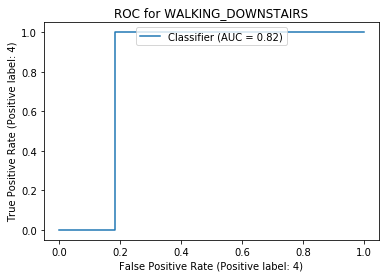

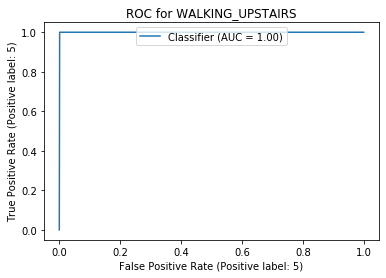

In [96]:
from sklearn.metrics import RocCurveDisplay
for i in list(set(y_labeled_test)):
    RocCurveDisplay.from_predictions(y_labeled_test, y_pred_SVC,pos_label=i)
    plt.title('ROC for '+ z[i])
    plt.legend(loc='upper center')
    plt.savefig('ROC for '+ z[i]+'.jpg')

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

        axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
        axes[0].set_xlabel("Training examples")
        axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


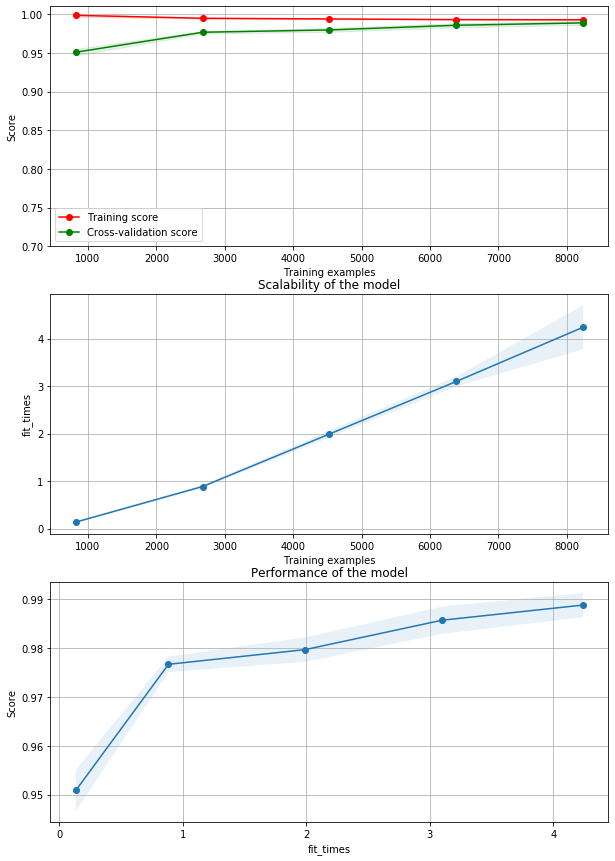

In [67]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
title = r"Learning Curves (SVM, Linear kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(kernel = 'linear',C=1,gamma=0.001)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.show()

In [79]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
train_scores, valid_scores = validation_curve(
   Ridge(), X, y, param_name="alpha", param_range=np.logspace(-7, 3, 3),
   cv=5)

In [90]:
import sys
from io import StringIO
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
classifier_SVC=SVC(kernel = 'linear',C=1,gamma=0.001)
classifier_SVC.fit(x_Scaler_train,y_labeled)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

In [88]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.close()

In [92]:
loss_history

''